In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
!pip install pyarrow
from google.colab import files

In [ ]:

uploaded = files.upload()

Saving testcase.parquet to testcase (1).parquet


In [ ]:
df = pd.read_parquet('testcase.parquet')

df.head()

,userID,signups,country,currency,deposit,days_till_deposit,deposit_status
0,1.0,2023-08-08,UK,GBP,0.0,NaN,UNATTEMPTED
1,2.0,2023-08-25,UK,GBP,0.0,NaN,UNATTEMPTED
2,3.0,2023-09-03,UK,GBP,0.0,NaN,UNATTEMPTED
3,4.0,2023-08-23,UK,GBP,16.4,10.0,SUCCESSFUL
4,5.0,2023-09-15,UK,GBP,0.0,NaN,NON SUCCESSFUL


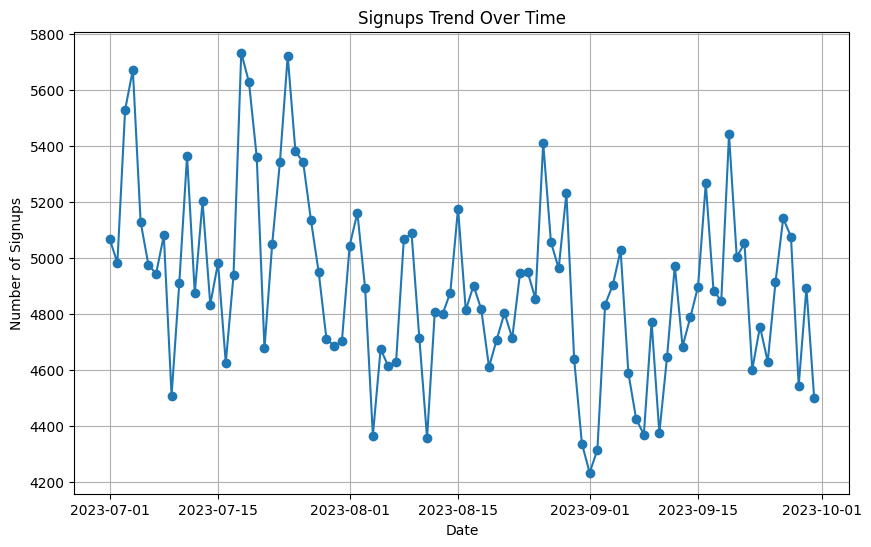

In [ ]:
# Convert
df['signups'] = pd.to_datetime(df['signups'])

# Group by signup date to get the number of signups per day
signup_trend = df.groupby(df['signups'].dt.date).size()

# Plot the signups trend
plt.figure(figsize=(10, 6))
plt.plot(signup_trend.index, signup_trend.values, marker='o', linestyle='-')
plt.title('Signups Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

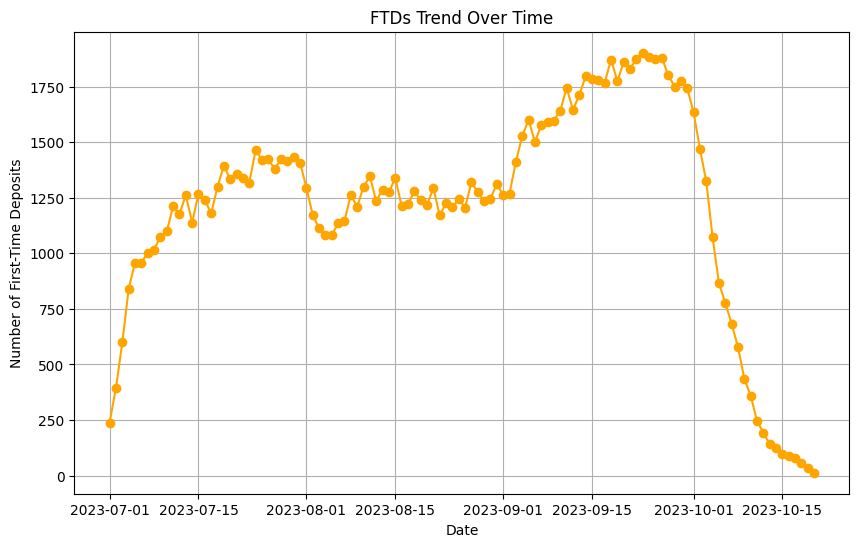

In [ ]:
# Convert the deposit date to a datetime
df['ftd_date'] = df['signups'] + pd.to_timedelta(df['days_till_deposit'], unit='D')

# Filter to only successful ftds
ftds = df[df['deposit_status'] == 'SUCCESSFUL'].groupby(df['ftd_date'].dt.date).size()

# Plot the FTD trend
plt.figure(figsize=(10, 6))
plt.plot(ftds.index, ftds.values, marker='o', linestyle='-', color='orange')
plt.title('FTDs Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of First-Time Deposits')
plt.grid(True)
plt.show()


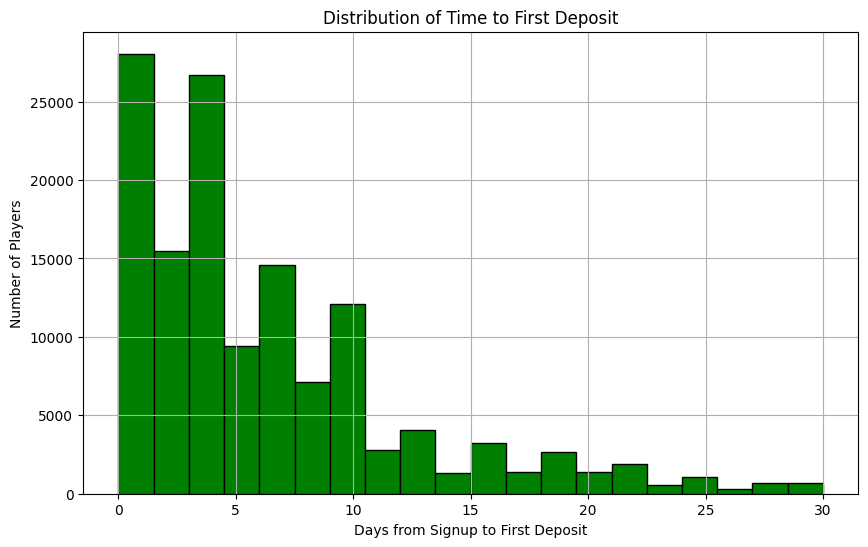

In [ ]:
# Calculate the number of days it takes to make the first deposit
df['days_to_ftd'] = df['days_till_deposit']

# Plot the distribution of time to first deposit
plt.figure(figsize=(10, 6))
plt.hist(df['days_to_ftd'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribution of Time to First Deposit')
plt.xlabel('Days from Signup to First Deposit')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

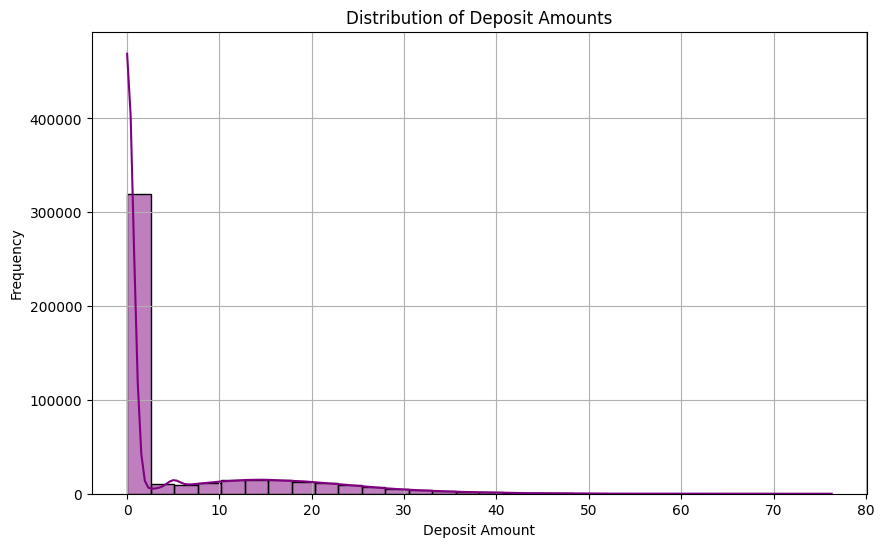

5th Percentile: 0.0
95th Percentile: 25.7


In [ ]:

# Plot the distribution of deposit amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['deposit'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Deposit Amounts')
plt.xlabel('Deposit Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the 5th and 95th percentiles
percentiles = df['deposit'].quantile([0.05, 0.95])
print(f"5th Percentile: {percentiles.iloc[0]}")
print(f"95th Percentile: {percentiles.iloc[1]}")


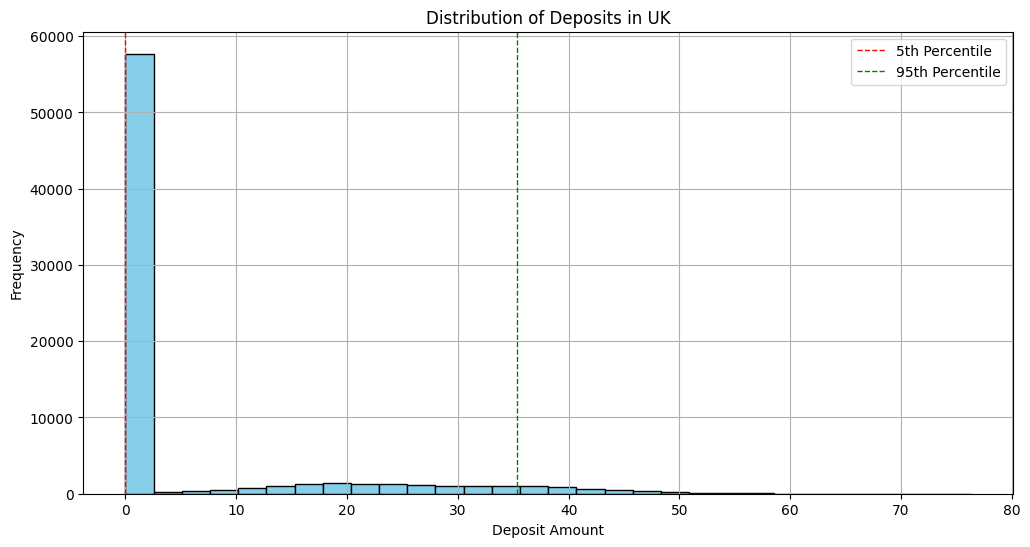

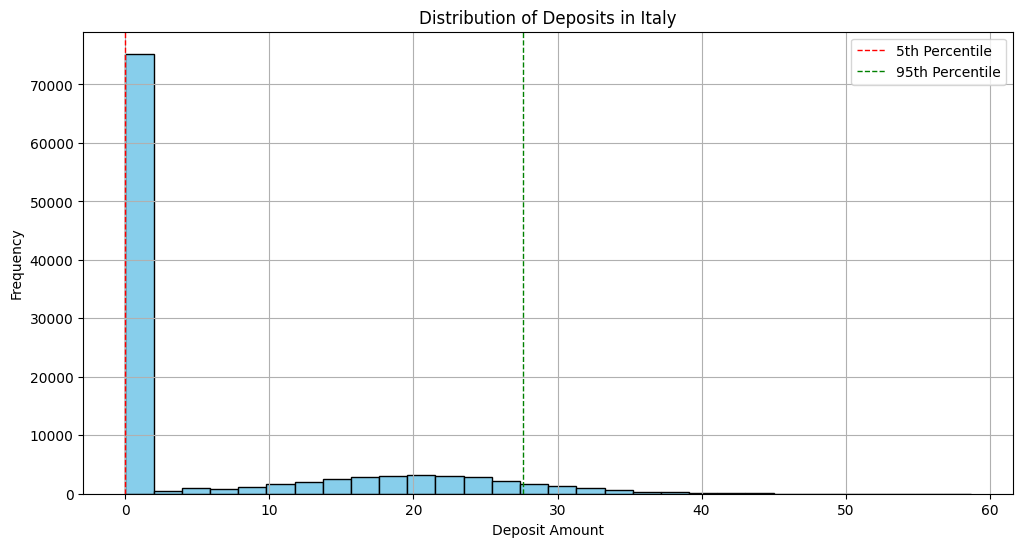

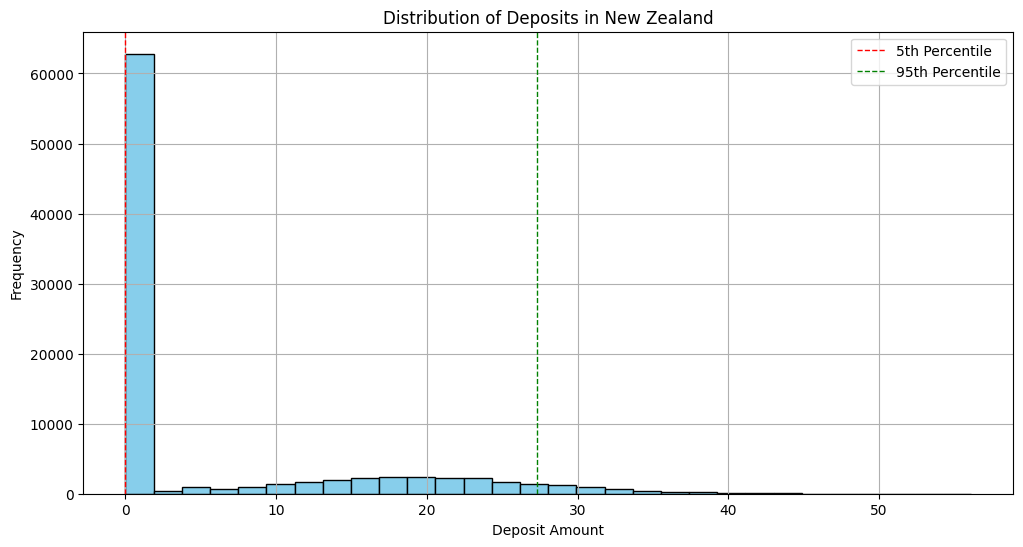

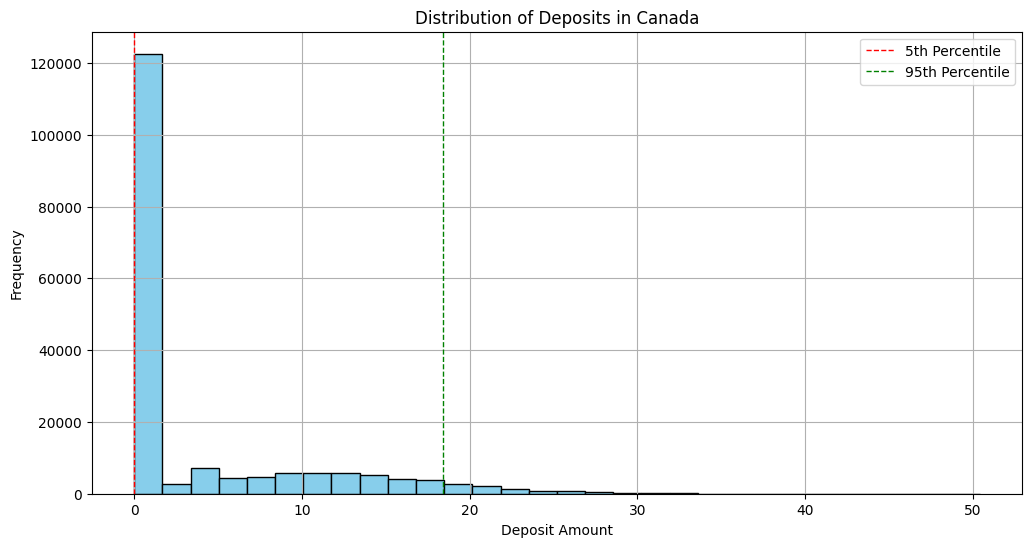

In [ ]:
# Group by country and calculate percentiles within each group
countries = df['country'].unique()

for country in countries:
    country_data = df[df['country'] == country]
    p5_country = np.percentile(country_data['deposit'], 5)
    p95_country = np.percentile(country_data['deposit'], 95)

    plt.figure(figsize=(12, 6))
    plt.hist(country_data['deposit'], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(p5_country, color='red', linestyle='dashed', linewidth=1, label='5th Percentile')
    plt.axvline(p95_country, color='green', linestyle='dashed', linewidth=1, label='95th Percentile')
    plt.title(f'Distribution of Deposits in {country}')
    plt.xlabel('Deposit Amount')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Calculate the total number of signups
total_signups = df['userID'].nunique()
print(f"Total Number of Signups: {total_signups}")


Total Number of Signups: 419630
